## Recap: Maths in machine learning

### 1. Algebra of vectors and matrices

#### 1.1 Vectors

We have this vector representation:
$$ x = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} $$

The transpose of the two-component column vector is:
$$ x^\mathsf{T}= \begin{pmatrix} x_1 , x_2 \end{pmatrix} $$

The sum of two column vectors is given by:
$$ x+y = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} + \begin{pmatrix} y_1 \\ y_2 \end{pmatrix} = \begin{pmatrix} x_1+y_1 \\ x_2+y_2 \end{pmatrix} $$

And the inner product by:
$$ x^\mathsf{T}y = \begin{pmatrix} x_1 , x_2 \end{pmatrix}  \begin{pmatrix} y_1 \\ y_2 \end{pmatrix} = x_1y_1 + x_2y_2 $$

The length or euclidean norm of the vector $x$ is:
$$ \Vert x \Vert = \sqrt{x_1^2 + x_2^2} = \sqrt{x^\mathsf{T}x}$$

As we can see, the inner product of $x$ and $y$ can be expressed in terms of the vector lenghts and the angle $\theta$ between the two vectors:
$$ x^\mathsf{T}y = \Vert x \Vert \Vert y \Vert \cos\theta$$

If $\theta$ is 90 degrees, then the vectors are said to be *orthogonal*, in which case: 
$$ x^\mathsf{T}y = 0$$

We can see that any vector can be expressed in terms of orthogonal *unit vectors*:
$$ x = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = x_1 \begin{pmatrix} 1 \\ 0 \end{pmatrix} + x_2 \begin{pmatrix} 0 \\ 1 \end{pmatrix} $$

$$ x = x_1i + x_2j$$


#### 1.2 Matrices

A 2x2 matrix is written in the form

$$ \mathbf{A} = \begin{pmatrix} a_{11} & a_{12}\\ a_{21} & a_{22} \end{pmatrix} $$

The notation per each element in the matrix is: first index means row, second index means column. When a matrix is multiplied with a vector, the result is another vector:

$$ \mathbf{A}x = \begin{pmatrix} a_{11} & a_{12}\\ a_{21} & a_{22} \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} a_{11}x_1 + a_{12}x_2 \\ a_{21}x_1 + a_{22}x_2 \end{pmatrix} $$

In general, for $ \mathbf{A} = (a_1, a_2 ... a_N)$, where the vectors $a_i$ are the columns of $\mathbf{A}$:
$$ \mathbf{A}x = x_1a_1 + x_2a_2 + ... + x_Na_N $$

The product of two 2x2 matrices is given by:
$$ \mathbf{A}\mathbf{B} = \begin{pmatrix} a_{11} & a_{12}\\ a_{21} & a_{22} \end{pmatrix} \begin{pmatrix} b_{11} & b_{12}\\ b_{21} & b_{22} \end{pmatrix} = \begin{pmatrix} a_{11}b_{11} + a_{12}b_{21} & a_{11}b_{12} + a_{12}b_{22} \\ a_{21}b_{11} + a_{22}b_{21} & a_{21}b_{12} + a_{22}b_{22} \end{pmatrix}$$

The matrix product is allowed whenever $\mathbf{A}$ has the same number of columns as $\mathbf{B}$ has rows. So for this case, if $\mathbf{A}$ has dimension $l$ x $m$ and $\mathbf{B}$ has dimension $m$ x $n$ then $\mathbf{A}\mathbf{B}$ is $l$ x $n$ with elements:
$$ (\mathbf{A}\mathbf{B})_{ij} = (\sum_{k=1}^m a_{ik}b_{kj}) : i= 1...l, j= 1...n$$

Note that matrix multiplication is not commutative, this means $\mathbf{A}\mathbf{B} \neq \mathbf{B}\mathbf{A}$ in general. However it is associative:
$$ (\mathbf{A}\mathbf{B})\mathbf{C} = \mathbf{A}(\mathbf{B}\mathbf{C})$$



In [29]:
%%capture
!pip install -r '../requirements.txt'

In [6]:
import numpy as np
import pandas as pd

In [7]:
# Example
A = np.array([[1,2],[3,4]])
B = np.array([1,1])
np.dot(A,B)

array([3, 7])

In [8]:
# This is different
A * B

array([[1, 2],
       [3, 4]])

In [9]:
# Another way to create a multiplication
A @ B

array([3, 7])

### 2. Images, manipulation and processing

An image (from Latin: imago) is an artifact, such as a photograph or other two-dimensional picture, that resembles a subject—usually a physical object—and thus provides a depiction of it. In the context of signal processing, an image is a distributed amplitude of color(s)[1]. In a computer, images are translated to matrices, with colors represented by channels. If we only have one channel the image could be a gray colored one, and three channels represents commonly red, green and blue (RGB).

We will use OpenCV, a well known package, to open images from JPEG, BMP and GIF files. 

In [15]:
!pip install opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 MB 33.8 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [16]:
# Step 0. Import libraries
import cv2
import matplotlib.pyplot as plt

In [41]:
# Step 1. Read file
# Remember, images read by CV2 use BGR
dino = cv2.imread('../data/raw/dinosaur.jpg')
dino.shape

(700, 700, 3)

In [42]:
# Show the structure. Values go from 0 to 255 (bright intensity)
dino

array([[[177, 189, 195],
        [177, 189, 195],
        [177, 189, 195],
        ...,
        [230, 239, 242],
        [230, 239, 242],
        [231, 240, 243]],

       [[177, 189, 195],
        [177, 189, 195],
        [178, 190, 196],
        ...,
        [231, 240, 243],
        [231, 240, 243],
        [231, 240, 243]],

       [[178, 190, 196],
        [178, 190, 196],
        [178, 190, 196],
        ...,
        [232, 241, 244],
        [232, 241, 244],
        [232, 241, 244]],

       ...,

       [[ 73,  78,  93],
        [ 65,  70,  85],
        [ 75,  80,  95],
        ...,
        [166, 185, 192],
        [166, 185, 192],
        [166, 185, 192]],

       [[ 57,  60,  75],
        [ 43,  46,  61],
        [ 51,  54,  69],
        ...,
        [166, 185, 192],
        [165, 184, 191],
        [165, 184, 191]],

       [[ 33,  36,  51],
        [ 44,  47,  62],
        [ 65,  68,  83],
        ...,
        [167, 186, 193],
        [166, 185, 192],
        [165, 184, 191]]

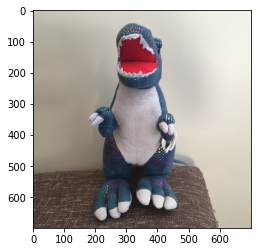

In [44]:
# We'll use Matplotlib to show the image
# Convertir de BGR a RGB
plt.imshow(cv2.cvtColor(dino,cv2.COLOR_BGR2RGB))
plt.show()

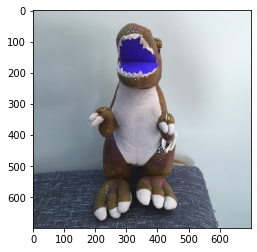

In [45]:
# Sin convertir de BGR a RGB
plt.imshow(dino)
plt.show()

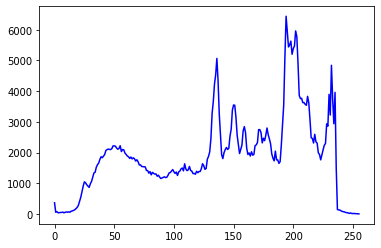

In [22]:
# Let's see the color histogram
blue_data = cv2.calcHist([dino], [0], None, [256], [0,255])
plt.plot(blue_data, color='b')
plt.show()

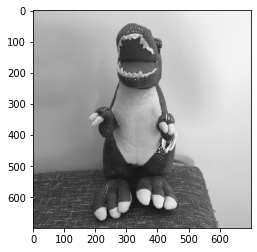

In [23]:
# Let's convert our dinosaur to gray
dino_gray = cv2.cvtColor(dino, cv2.COLOR_BGR2GRAY)
plt.imshow(dino_gray, cmap='gray')
plt.show()

In [48]:
dino_gray.shape

(700, 700)

In [47]:
# Otra forma de separar los colores BGR
b,g,r = cv2.split(dino)

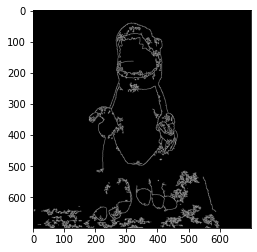

In [53]:
# Find edges using Canny algorithm
dino_edges = cv2.Canny(dino_gray, 30, 600)
plt.imshow(dino_edges, cmap='gray')
plt.show()


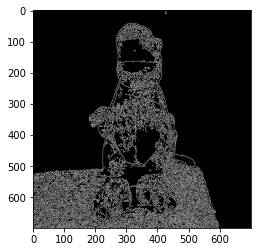

In [54]:
# Canny busca el contorno, cambio a 100 y no es tan nitido
dino_edges2 = cv2.Canny(dino_gray, 30, 100)
plt.imshow(dino_edges2, cmap='gray')
plt.show()

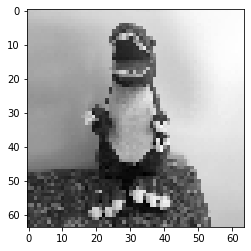

In [55]:
dino_resized = cv2.resize(dino_gray, dsize=(64,64))
plt.imshow(dino_resized, cmap='gray')
plt.show()

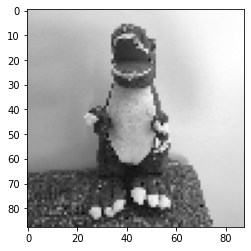

In [26]:
# Let's sample just some columns
plt.imshow(dino_gray[::8,::8], cmap='gray')
plt.show()


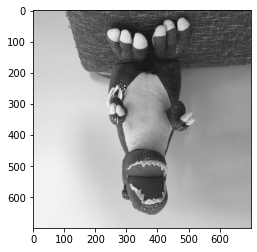

In [27]:
# Or just invert the image. As you'll see, slicing is our friend
plt.imshow(dino_gray[::-1,::-1], cmap='gray')
plt.show()

### 3. Distance and Clustering
#### 3.1 What is clustering?
Cluster analysis is the grouping of objects such that objects in the same cluster are more similar to each other than they are to objects in another cluster. The classification into clusters is done using criteria such as smallest distances, density of data points, graphs, or various statistical distributions. Cluster analysis has  wide applicability, including in unsupervised machine learning, data mining, statistics, Graph Analytics,  image processing, and numerous physical and social science applications.
#### 3.2 Why cluster analysis?
Data scientists and others use clustering to gain important insights from data by observing what groups (or clusters) the data points fall into when they apply a clustering algorithm to the data. By definition, unsupervised learning is a type of machine learning that searches for patterns in a data set with no pre-existing labels and a minimum of human intervention. Clustering can also be used for anomaly detection to find data points that are not part of any cluster, or outliers.
Clustering is used to identify groups of similar objects in datasets with two or more variable quantities. In practice, this data may be collected from marketing, biomedical, or geospatial databases, among many other places. [2]

Ref.
2. https://www.nvidia.com/en-us/glossary/data-science/clustering/


In [63]:
# Let's proceed with a sample
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances, silhouette_score
import seaborn as sns

In [31]:
# We'll grab the X values (4 columns as you remember)
data = load_iris()
X_values = data.data
X_values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [57]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_values)

In [59]:
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [60]:
# Let's calculate the distance per each point
dist = pairwise_distances(X_scaled)

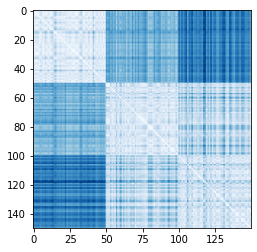

In [61]:

plt.imshow(dist, cmap='Blues')
plt.show()

In [35]:
k = range(2,7)
wss = []
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(X_scaled)
    wss_inertia = kmeans.inertia_
    wss.append(wss_inertia)

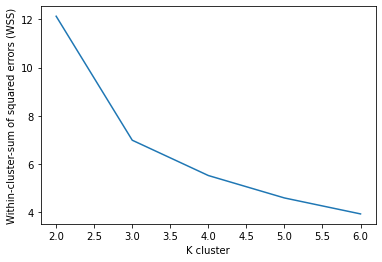

In [36]:
plt.plot(k, wss)
plt.ylabel('Within-cluster-sum of squared errors (WSS)')
plt.xlabel('K cluster')
plt.show()

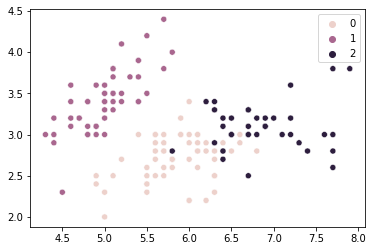

In [37]:
kmeans_final = KMeans(n_clusters=3)
kmeans_final = kmeans_final.fit(X_scaled)
cluster_labels = kmeans_final.labels_
sns.scatterplot(x=X_values[:,0],y=X_values[:,1], hue=cluster_labels)
plt.show()
 

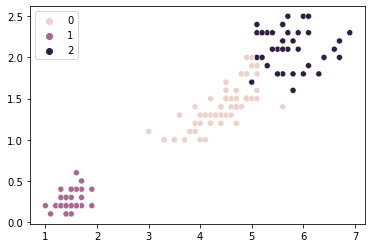

In [62]:
kmeans_final = KMeans(n_clusters=3)
kmeans_final = kmeans_final.fit(X_scaled)
cluster_labels = kmeans_final.labels_
sns.scatterplot(x=X_values[:,2],y=X_values[:,3], hue=cluster_labels)
plt.show()

![Neural network representation](https://www.datasciencecentral.com/wp-content/uploads/2021/10/2808330901.jpeg)

## 2. Creating a Neural Network

Suppose we have the following table:

| X1 | X2 | X3 | Y1 |
|----|----|----|----|
| 0  | 0  | 1  | 0  |
| 1  | 1  | 1  | 1  |
| 1  | 0  | 1  | 1  |
| 0  | 1  | 1  | 0  |

As we can see, we have 3 IVs and 1 DV, and by simply using measuring statistics we could see that X1 is perfectly correlated with Y1. Our neural network will have two processes: forward propagation, when creating the inner layers by multiplying the input (IVs) with weights and the backpropagation, when updating the weights.





In [38]:
import numpy as np

# Let's create a sigmoid function (our non linear function)
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# input dataset
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

# output dataset           
y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1
 
for iter in range(10000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    # how much did we miss?
    l1_error = y - l1
    # multiply how much we missed by the
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)
    # update weights
    syn0 += np.dot(l0.T,l1_delta)

print("Output After Training:")
print(l1)

Output After Training:
[[0.00966449]
 [0.00786506]
 [0.99358898]
 [0.99211957]]


In [39]:
# Hidden layer
l1

array([[0.00966449],
       [0.00786506],
       [0.99358898],
       [0.99211957]])

In [40]:
# Weights
syn0

array([[ 9.67299303],
       [-0.2078435 ],
       [-4.62963669]])